
<font face="verdana" size="6" color="blue">Introducing Webscraping</font> 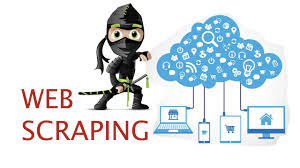

1. <font color="blue">What is Web scraping?</font>
2. <font color="blue">Why do we need to web scrape?</font>
3. <font color="blue">What are some common instances of webscraping?</font>
4. <font color="blue">How do we scrape?</font>


1. Web scraping is a technique that allows you to extract data from websites and store it locally or in a database. It's also known as web harvesting, data scraping or data crawling. There is a lot of software out there that you can install and use to web scrape. Today, I'm going to introduce you to a super friendly and free python package called Beautiful Soup but Scrapy is another free package out there thats popular.

2. Why do we need to webscrape? Most websites only allow you to view data thru a web browser. They don't offer the functionality to save a copy of their data. Manually coping the data could take large amounts of time. Scraping software can automate the process and perform the task within a fraction of the time. 

3. **What are some common uses of webscraping?**


- **E-commerce Websites:** Web scrapers can collect the data specially related to the
  price of a specific product from various e-commerce websites for their comparison.
- **Content Aggregators:** Web scraping is used widely by content aggregators like
  news aggregators and job aggregators for providing updated data to their users.
- **Marketing and Sales Campaigns:** Web scrapers can be used to get the data like
  emails, phone number etc. for sales and marketing campaigns.
- **Data for Machine Learning Projects:** Retrieval of data for machine learning
  projects depends upon web scraping.

4. **How do we web scrape???** 

What are the basic components of a web page? There are typically around 4 basic components of a web page. 

- html - which contains the main content of a page 
- css - adds styling to make the page pretty 
- js - javescript files add interactivity to pages 
- JPG & PNG - are image formats used to show pictures 

<font face="verdana" size="6" color="blue">HTML</font>

Hypertext Markup Language is the expression of webpages. The language. Its unlike python however in that it has no ability to rationalize. It can make text italicized or bold; it can create paragraphs; it cannot perform recursion. 

**Here is a doctype declaration tag that that tells the web browser which version to use. It doesn't require a closing tag.** 

**The following html tags are opening and closing tags that tell the browser to interpret everything between these tags as html code. Typically, you'll embed a** _head_ **and a** _body_ **section within the opening and closing html tags. The head contains metadata about the html document(this information generally isn't useful for web scraping) and the body contains the actual content.** 

**Tags have commonly used names that depend on their position in relation to other tags:**

- **child — a child is a tag inside another tag. So the two p tags above are both children of the body tag.**
- **parent — a parent is the tag another tag is inside. Above, the html tag is the parent of the body tag.**
- **sibiling — a sibiling is a tag that is nested inside the same parent as another tag. For example, head and body are siblings, since they’re both inside html. Both p tags are siblings, since they’re both inside body.**

**Lastly, we should understand a little bit about class and id properties. These special properties give HTML elements names, and make them easier to interact with when we’re scraping. One element can have multiple classes, and a class can be shared between elements. Each element can only have one id, and an id can only be used once on a given page. Classes and ids are optional.** 



```html
<!DOCTYPE html>  
<html>  
    <!-- This is the syntax for adding helpful comments that will not be rendered to the browser -->
    <head>   
        
    </head>
    
    <body>
        <!-- The following are html elements. There is a good resource for html documentation at the end of this notebook --> 

        <h1>My Heading</h1>
        <p>My Paragraph</p>
        
    </body>

</html>
```
 

<font face="verdana" size="6" color="blue">Beautiful Soup</font>              
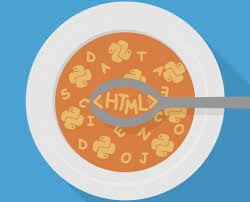
**A python library designed for quick scraping projects. It allows you to select and navigate the tree-like structure of HTML documents, searching for particular tags, attributes or ids.**

**Right-click on any webpage, click Inspect, and you'll see the innards of that site: its source code, the images and CSS that form its design, the fonts and icons it uses, the Javascript code that powers animations, and more. You can see how long the site takes to load, how much bandwidth it used to download, and the exact color in its text.**

**To extract data using web scraping with python, you need to follow these basic steps:**

1. <font color="blue">Find the URL that you want to scrape</font>
2. <font color="blue">Inspecting the Page</font>
3. <font color="blue">Find the data you want to extract</font>
4. <font color="blue">Write the code</font>
5. <font color="blue">Run the code and extract the data</font>
6. <font color="blue">Store the data in the required format</font>






In [1]:
from bs4 import BeautifulSoup
import requests 
import re  
import pandas as pd

1. Download the web page containing the forecast.
2. Create a BeautifulSoup class to parse the page.
3. Find the div with id seven-day-forecast, and assign to seven_day
4. Inside seven_day, find each individual forecast item.
5. Extract and print the first forecast item.

In [ ]:
'''User agents - You are the user agent. You have a unique catalog of 
technical data that describes the device and software you are using.'''

In [4]:
url = "https://forecast.weather.gov/MapClick.php?lat=33.749&lon=-84.388#.XZzbB-dKjMI"
headers= {'user-agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_6) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/80.0.3987.132 Safari/537.36'}
page = requests.get(url, timeout=5, headers=headers) #timeout in seconds
soup = BeautifulSoup(page.content, 'html.parser')
seven_day = soup.find(id="seven-day-forecast")
forecast_items = seven_day.find_all(class_="tombstone-container")
afternoon = forecast_items[0]
print(afternoon.prettify())

<div class="tombstone-container">
 <p class="period-name">
  Today
  <br/>
  <br/>
 </p>
 <p>
  <img alt="Today: A chance of showers before 3pm, then a chance of showers and thunderstorms between 3pm and 5pm, then showers likely and possibly a thunderstorm after 5pm.  Partly sunny, with a high near 79. Southwest wind around 10 mph, with gusts as high as 20 mph.  Chance of precipitation is 60%." class="forecast-icon" src="DualImage.php?i=shra&amp;j=shra&amp;ip=20&amp;jp=60" title="Today: A chance of showers before 3pm, then a chance of showers and thunderstorms between 3pm and 5pm, then showers likely and possibly a thunderstorm after 5pm.  Partly sunny, with a high near 79. Southwest wind around 10 mph, with gusts as high as 20 mph.  Chance of precipitation is 60%."/>
 </p>
 <p class="short-desc">
  Slight Chance
  <br/>
  Showers then
  <br/>
  Showers
  <br/>
  Likely
 </p>
 <p class="temp temp-high">
  High: 79 °F
 </p>
</div>


In [16]:
if page.status_code == 200:
    print('Proceed')

Proceed


**As you can see, inside the forecast item afternoon is all the information we want. The name of the forecast item(afternoon), the description of the conditions, a short version of the description and the temperature** 

In [5]:
period = afternoon.find(class_="period-name").get_text()
short_desc = afternoon.find(class_="short-desc").get_text()
temp = afternoon.find(class_="temp").get_text()
print(period)
print(short_desc)
print(temp)

Today
Slight ChanceShowers thenShowersLikely
High: 79 °F


**Now lets extract the title attribute from the img tag. Does anyone know how we might be able to do that?** 

In [6]:
img = afternoon.find("img")
desc = img['title']
print(desc)

Today: A chance of showers before 3pm, then a chance of showers and thunderstorms between 3pm and 5pm, then showers likely and possibly a thunderstorm after 5pm.  Partly sunny, with a high near 79. Southwest wind around 10 mph, with gusts as high as 20 mph.  Chance of precipitation is 60%.


**So, we figured out how to grab individual information now lets grab everything at once**

In [7]:
period_tags = seven_day.select(".tombstone-container .period-name")
periods = [pt.get_text() for pt in period_tags] #get_text is a BS method used to extract text from the object
periods

['Today',
 'Tonight',
 'Saturday',
 'SaturdayNight',
 'Sunday',
 'SundayNight',
 'Monday',
 'MondayNight',
 'Tuesday']

**As you can see above, our technique gets us each of the period names, in order. We can apply the same technique to get the other 3 fields**

In [8]:
short_descs = [sd.get_text() for sd in seven_day.select(".tombstone-container .short-desc")]
temps = [t.get_text() for t in seven_day.select(".tombstone-container .temp")]
descs = [d["title"] for d in seven_day.select(".tombstone-container img")]
print(short_descs)
print(temps)
print(descs)

['Slight ChanceShowers thenShowersLikely', 'Showers', 'ChanceShowers', 'Mostly Cloudy', 'ChanceShowers thenShowersLikely', 'Showers', 'ShowersLikely', 'Slight ChanceT-storms', 'ChanceShowers']
['High: 79 °F', 'Low: 59 °F', 'High: 72 °F', 'Low: 53 °F', 'High: 64 °F', 'Low: 54 °F', 'High: 67 °F', 'Low: 53 °F', 'High: 70 °F']
['Today: A chance of showers before 3pm, then a chance of showers and thunderstorms between 3pm and 5pm, then showers likely and possibly a thunderstorm after 5pm.  Partly sunny, with a high near 79. Southwest wind around 10 mph, with gusts as high as 20 mph.  Chance of precipitation is 60%.', 'Tonight: Showers and possibly a thunderstorm before 1am, then showers likely.  Low around 59. Northwest wind 5 to 10 mph.  Chance of precipitation is 80%. New rainfall amounts between a quarter and half of an inch possible. ', 'Saturday: A 30 percent chance of showers, mainly before 2pm.  Mostly cloudy, with a high near 72. Northwest wind 5 to 10 mph, with gusts as high as 15 

**In order to do this, we’ll call the DataFrame class, and pass in each list of items that we have. We pass them in as part of a dictionary. Each dictionary key will become a column in the DataFrame, and each list will become the values in the column**

In [9]:
weather = pd.DataFrame({"period": periods, "short_desc": short_descs, "temp": temps, "desc": descs})
weather

,period,short_desc,temp,desc
0,Today,Slight ChanceShowers thenShowersLikely,High: 79 °F,"Today: A chance of showers before 3pm, then a ..."
1,Tonight,Showers,Low: 59 °F,Tonight: Showers and possibly a thunderstorm b...
2,Saturday,ChanceShowers,High: 72 °F,"Saturday: A 30 percent chance of showers, main..."
3,SaturdayNight,Mostly Cloudy,Low: 53 °F,"Saturday Night: Mostly cloudy, with a low arou..."
4,Sunday,ChanceShowers thenShowersLikely,High: 64 °F,"Sunday: Showers likely, mainly after 2pm. Clo..."
5,SundayNight,Showers,Low: 54 °F,Sunday Night: Showers and possibly a thunderst...
6,Monday,ShowersLikely,High: 67 °F,Monday: Showers likely and possibly a thunders...
7,MondayNight,Slight ChanceT-storms,Low: 53 °F,Monday Night: A 20 percent chance of showers a...
8,Tuesday,ChanceShowers,High: 70 °F,Tuesday: A 40 percent chance of showers and th...


**We want to get rid of the degrees so we can use regex and str.extract(its a pandas series method) to pull out the numeric temp values**

In [10]:
temp_nums = weather["temp"].str.extract("(?P<temp_num>\d+)", expand=False)
weather["temp_num"] = temp_nums.astype('int')
temp_nums

0    79
1    59
2    72
3    53
4    64
5    54
6    67
7    53
8    70
Name: temp_num, dtype: object

In [11]:
weather["temp_num"].mean()

63.44444444444444

In [12]:
is_day = weather["temp"].str.contains("High")
weather["is_day"] = is_day
is_day

0     True
1    False
2     True
3    False
4     True
5    False
6     True
7    False
8     True
Name: temp, dtype: bool

In [14]:
weather[is_day]

,period,short_desc,temp,desc,temp_num,is_day
0,Today,DecreasingClouds,High: 78 °F,"Today: Cloudy, then gradually becoming mostly ...",78,True
2,Thursday,Sunny,High: 80 °F,"Thursday: Sunny, with a high near 80. East win...",80,True
4,Friday,Sunny,High: 84 °F,"Friday: Sunny, with a high near 84. Calm wind.",84,True
6,Saturday,Slight ChanceT-storms,High: 80 °F,Saturday: A 20 percent chance of showers and t...,80,True
8,Sunday,Sunny,High: 78 °F,"Sunday: Sunny, with a high near 78.",78,True


<font face="serif" size="5" color="blue">Web Scraping Best Practices</font>

1. If a website has an API you should use it. 
2. Check what websites allow you to scrape with robot.txt. 
3. Set headers and a timeout 

## Resources 


<a href="https://devdocs.io/html/reference">HTML Elements and Attributes Reference</a>

<a href="https://www.w3schools.com/">Everything Web Dev</a>
